<a href="https://colab.research.google.com/github/edufrantzk/Metricas-de-comparacao-de-investimentos-em-diferentes-etfs/blob/main/medidas_de_compara%C3%A7%C3%A3o_entre_etfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install investpy

     |████████████████████████████████| 4.4 MB 5.0 MB/s 
     |████████████████████████████████| 235 kB 62.6 MB/s 
     |████████████████████████████████| 6.4 MB 39.1 MB/s 
     |████████████████████████████████| 503 kB 54.5 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=4cbf2534d5d2c8483273a92f9904d8df44d69fad38b74679fe9271fe6b6b1d67
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install -U pandas_datareader

     |████████████████████████████████| 109 kB 5.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
#Importando bibliotecas

import pandas as pd
import pandas_datareader as pdr
import investpy 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Extraindo dados do investing https://investpy.readthedocs.io/

bova = investpy.get_etf_historical_data('Ishares Ibovespa', 'brazil', from_date='01/01/2015', to_date='01/03/2022')

In [ ]:
bova.head()

,Open,High,Low,Close,Volume,Currency,Exchange
Date,,,,,,,
2015-01-02,48.13,48.34,46.97,47.26,2640740,BRL,BM&FBovespa
2015-01-05,46.50,46.65,45.99,46.32,938690,BRL,BM&FBovespa
2015-01-06,46.40,46.75,46.01,46.58,2002600,BRL,BM&FBovespa
2015-01-07,47.04,48.53,47.04,48.15,1498860,BRL,BM&FBovespa
2015-01-08,48.35,48.89,47.62,48.51,2032600,BRL,BM&FBovespa


In [ ]:
#Dropando colunas desnecessárias

bovaclose= bova.drop(columns=['Open', 'High', 'Low', 'Volume', 'Currency', 'Exchange'])
bovaclose.tail()

,Close
Date,
2022-02-21,107.45
2022-02-22,109.00
2022-02-23,107.58
2022-02-24,107.48
2022-02-25,108.90


In [ ]:
# Criando a coluna de retornos da primeira linha até final

bovaclose['Retornos'] = bovaclose['Close'].pct_change().iloc[1: ]
bovaclose

,Close,Retornos,Wealth_idx,Picos,Drawdowns
Date,,,,,
2015-01-02,47.26,NaN,NaN,NaN,NaN
2015-01-05,46.32,-0.019890,980.110030,980.110030,0.000000
2015-01-06,46.58,0.005613,985.611511,985.611511,0.000000
2015-01-07,48.15,0.033705,1018.831993,1018.831993,0.000000
2015-01-08,48.51,0.007477,1026.449429,1026.449429,0.000000
...,...,...,...,...,...
2022-02-21,107.45,-0.009769,2273.592890,2660.812526,-0.145527
2022-02-22,109.00,0.014425,2306.390182,2660.812526,-0.133201
2022-02-23,107.58,-0.013028,2276.343631,2660.812526,-0.144493


In [ ]:
# Usando a metrica de Weath Index investindo R$ 1000,00 em BOVA11 para saber quanto teriamos ao final acumulando os produtos dos retornos

bovaclose['Wealth_idx'] = 1000 * (bovaclose['Retornos'] + 1).cumprod()


In [ ]:
bovaclose.tail()

,Close,Retornos,Wealth_idx
Date,,,
2022-02-21,107.45,-0.009769,2273.592890
2022-02-22,109.00,0.014425,2306.390182
2022-02-23,107.58,-0.013028,2276.343631
2022-02-24,107.48,-0.000930,2274.227677
2022-02-25,108.90,0.013212,2304.274228


In [ ]:
#Plotando o gráfico do Wealth Index

wea_idx = bovaclose['Wealth_idx']

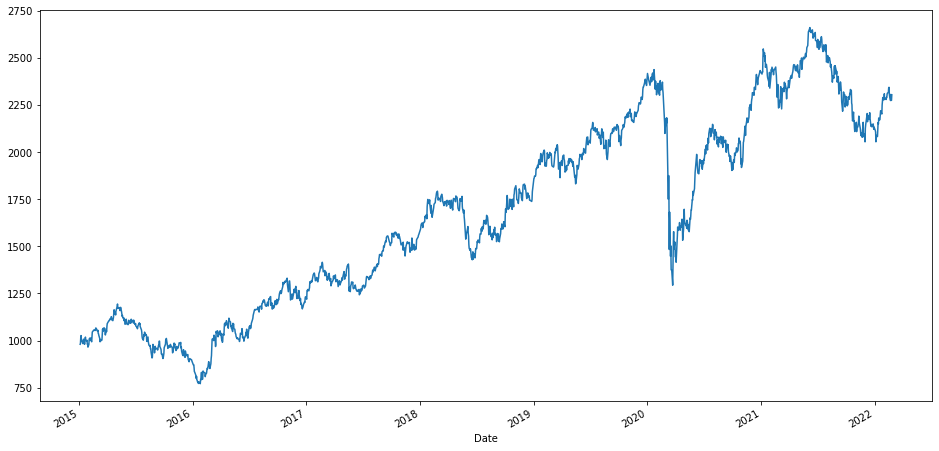

In [ ]:
wea_idx.plot(figsize=(16,8))


In [ ]:
#Calculando os picos da curva de capital(wealth index) ou seja, o maior valor que experimentamos

picos = wea_idx.cummax()
picos.tail()

Date
2022-02-21    2660.812526
2022-02-22    2660.812526
2022-02-23    2660.812526
2022-02-24    2660.812526
2022-02-25    2660.812526
Name: Wealth_idx, dtype: float64

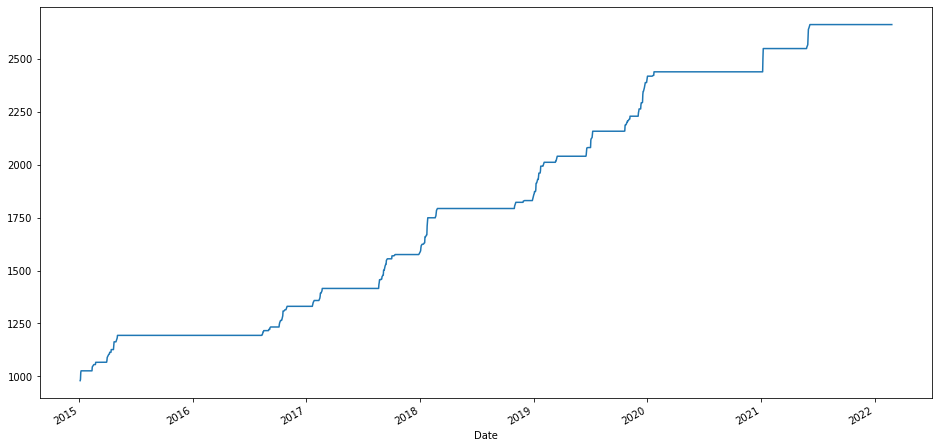

In [ ]:
picos.plot(figsize=(16,8))

In [ ]:
#Se os picos são os valores máximos da curva de capital e os drawdowns são seus valores mmínimos. É o tempo que a curva de capital fica sem renovar as máximas.

drawdown = (wea_idx - picos) / picos
drawdown.tail()

Date
2022-02-21   -0.145527
2022-02-22   -0.133201
2022-02-23   -0.144493
2022-02-24   -0.145288
2022-02-25   -0.133996
Name: Wealth_idx, dtype: float64

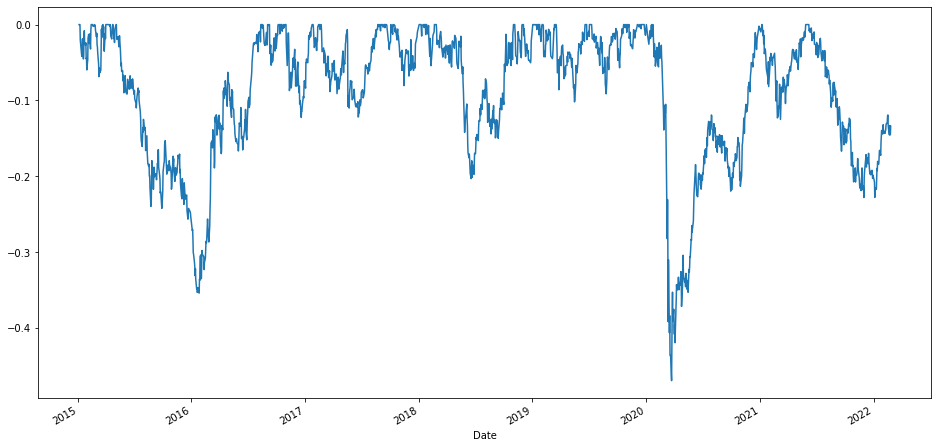

In [ ]:
drawdown.plot(figsize=(16,8))

In [ ]:
#Para saber o máximo de perda do período calculamos o máximo drawdown:

max_ddw = drawdown.min()


In [ ]:
#Em porcentagem: Esse foi o valor máximo de perda de capital sofrido no período de investimento em BOVA11

max_ddw * 100


-46.93168995746899

In [ ]:
#Adicionando os dados ao dataframe para juntar tudo graficamente:

bovaclose['Picos'] = picos
bovaclose['Drawdowns'] = drawdown

In [ ]:
bovaclose.tail()

,Close,Retornos,Wealth_idx,Picos,Drawdowns
Date,,,,,
2022-02-21,107.45,-0.009769,2273.592890,2660.812526,-0.145527
2022-02-22,109.00,0.014425,2306.390182,2660.812526,-0.133201
2022-02-23,107.58,-0.013028,2276.343631,2660.812526,-0.144493
2022-02-24,107.48,-0.000930,2274.227677,2660.812526,-0.145288
2022-02-25,108.90,0.013212,2304.274228,2660.812526,-0.133996


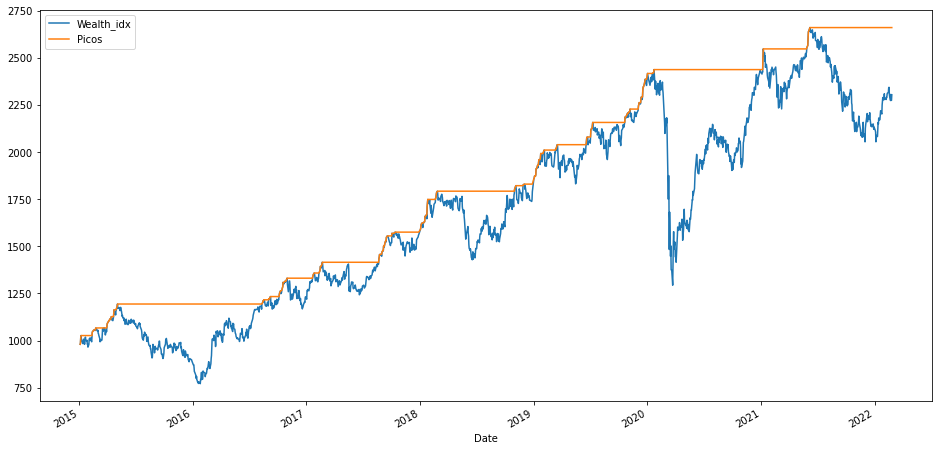

In [ ]:
# Gráfico

bovaclose[['Wealth_idx','Picos']].plot(figsize=(16,8))

In [ ]:
#Agora ainda vamos extrair os dados do ETF SMALL11 das smallcaps brasileiras e também do IVVB11 que reflete o índice S&P500 em dolares

In [ ]:
small = investpy.get_etf_historical_data('iShares BM&FBOVESPA Small Cap', 'brazil', from_date='01/01/2015', to_date='01/03/2022')

In [ ]:
small.head()

,Open,High,Low,Close,Volume,Currency,Exchange
Date,,,,,,,
2015-01-02,52.57,52.67,52.02,52.02,1150,BRL,BM&FBovespa
2015-01-05,52.00,52.00,50.50,50.55,640,BRL,BM&FBovespa
2015-01-06,50.55,50.80,50.00,50.00,2190,BRL,BM&FBovespa
2015-01-07,51.39,51.39,50.69,51.25,260,BRL,BM&FBovespa
2015-01-08,51.25,52.00,50.94,52.00,410,BRL,BM&FBovespa


In [ ]:
smallclose = small.drop(columns=['Open', 'High', 'Low', 'Volume', 'Currency', 'Exchange'])

In [ ]:
smallclose.tail()

,Close
Date,
2022-02-21,109.30
2022-02-22,111.60
2022-02-23,111.60
2022-02-24,111.50
2022-02-25,111.04


In [ ]:
# Calculando os retornos da primeira linha ate a final

smallclose['Retornos'] = smallclose['Close'].pct_change().iloc[1: ]
smallclose

,Close,Retornos
Date,,
2015-01-02,52.02,NaN
2015-01-05,50.55,-0.028258
2015-01-06,50.00,-0.010880
2015-01-07,51.25,0.025000
2015-01-08,52.00,0.014634
...,...,...
2022-02-21,109.30,-0.030169
2022-02-22,111.60,0.021043
2022-02-23,111.60,0.000000


In [ ]:
# Calculando a curva de capital investindo R$ 1000,00 em SMALL11 para saber quanto teriamos ao final acumulando os produtos dos retornos

smallclose['Wealth_idx'] = 1000 * (smallclose['Retornos'] + 1).cumprod()

In [ ]:
smallclose.tail()

,Close,Retornos,Wealth_idx
Date,,,
2022-02-21,109.30,-0.030169,2101.114956
2022-02-22,111.60,0.021043,2145.328720
2022-02-23,111.60,0.000000,2145.328720
2022-02-24,111.50,-0.000896,2143.406382
2022-02-25,111.04,-0.004126,2134.563629


In [ ]:
#Plotando o gráfico do Wealth Index

wea_idxsmall = smallclose['Wealth_idx']

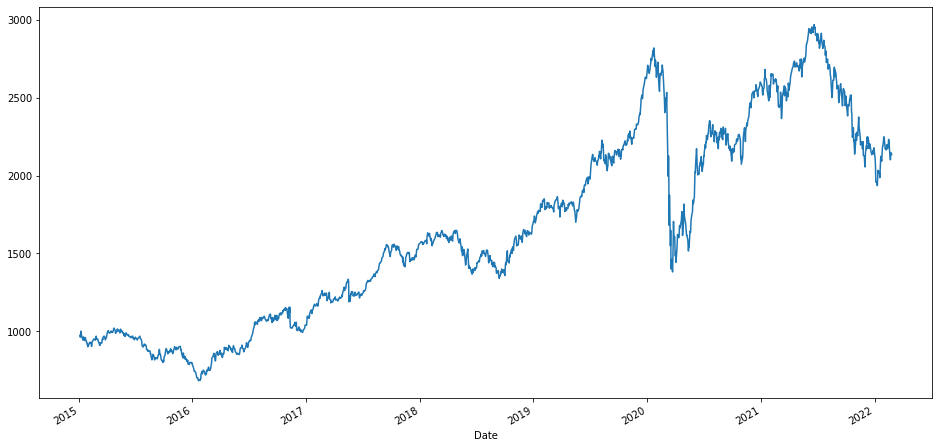

In [ ]:
wea_idxsmall.plot(figsize=(16,8))

In [ ]:
#Calculando os picos da curva de capital(wealth index) ou seja, o maior valor que experenciamos

picossmall = wea_idxsmall.cummax()
picossmall.tail()

Date
2022-02-21    2970.011534
2022-02-22    2970.011534
2022-02-23    2970.011534
2022-02-24    2970.011534
2022-02-25    2970.011534
Name: Wealth_idx, dtype: float64

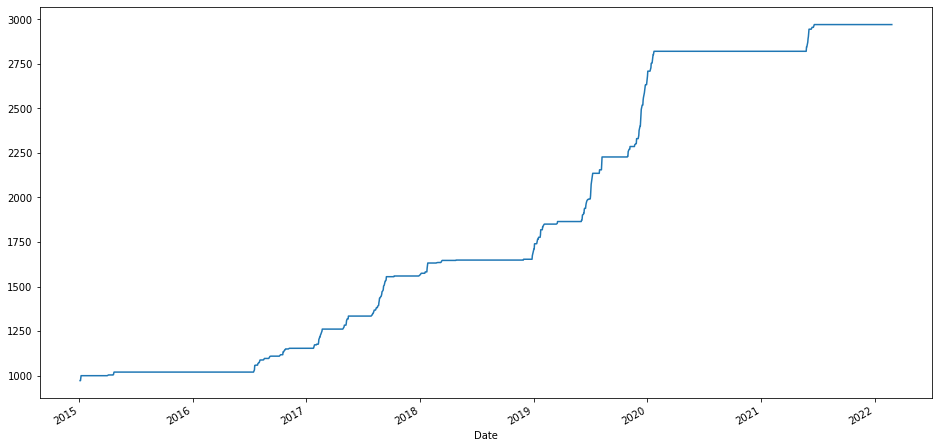

In [ ]:
picossmall.plot(figsize=(16,8))

In [ ]:
#Drawdown

drawdownsmall = (wea_idxsmall - picossmall) / picossmall
drawdownsmall

Date
2015-01-02         NaN
2015-01-05    0.000000
2015-01-06   -0.010880
2015-01-07    0.000000
2015-01-08    0.000000
                ...   
2022-02-21   -0.292557
2022-02-22   -0.277670
2022-02-23   -0.277670
2022-02-24   -0.278317
2022-02-25   -0.281294
Name: Wealth_idx, Length: 1768, dtype: float64

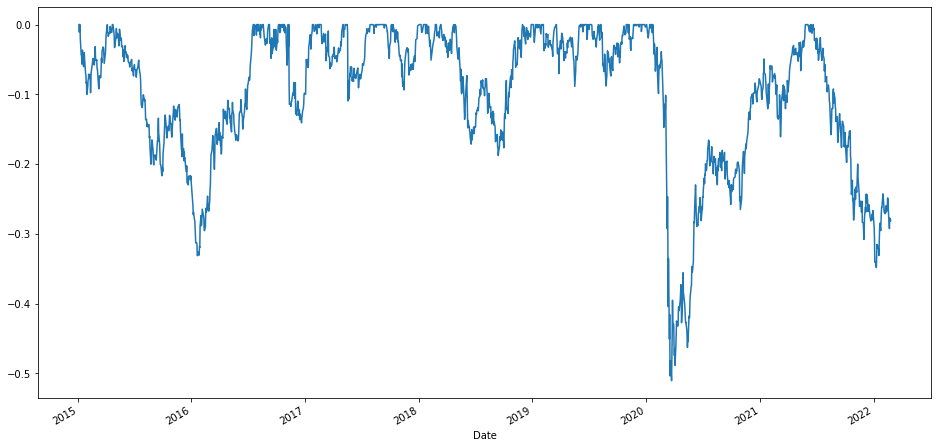

In [ ]:
drawdownsmall.plot(figsize=(16,8))

In [ ]:
#Máximo drawdown SMALL11

max_ddwsmall = drawdownsmall.min()

In [ ]:
#Em porcentagem

max_ddwsmall * 100

-51.05657805044309

In [ ]:
#Juntando tudo para visualizar graficamente:

smallclose['Picos'] = picossmall
smallclose['Drawdowns'] = drawdownsmall

In [ ]:
smallclose.tail()

,Close,Retornos,Wealth_idx,Picos,Drawdowns
Date,,,,,
2022-02-21,109.30,-0.030169,2101.114956,2970.011534,-0.292557
2022-02-22,111.60,0.021043,2145.328720,2970.011534,-0.277670
2022-02-23,111.60,0.000000,2145.328720,2970.011534,-0.277670
2022-02-24,111.50,-0.000896,2143.406382,2970.011534,-0.278317
2022-02-25,111.04,-0.004126,2134.563629,2970.011534,-0.281294


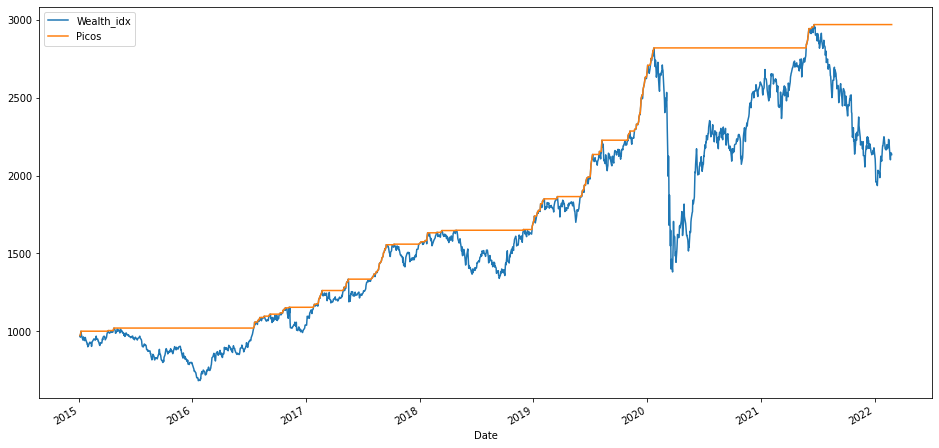

In [ ]:
smallclose[['Wealth_idx','Picos']].plot(figsize=(16,8))

In [ ]:
#Ainda vamos extrair os dados do IVVB11 e fazer a mesma análise desta vez fazendo a pesquisa plo search_quotes como se fosse no site investing.com

search_results = investpy.search_quotes(text = 'S&P', products= ['etfs'], countries= ['brazil'], n_results = 2)

for search_result in search_results:
  print(search_result)

{"id_": 956435, "name": "Fundo de Investimento Ishares S&P 500", "symbol": "IVVB11", "country": "brazil", "tag": "/etfs/fundo-de-invest-ishares-sp-500", "pair_type": "etfs", "exchange": "BM&FBovespa"}
{"id_": 956434, "name": "It Now S&P500 TRN", "symbol": "SPXI11", "country": "brazil", "tag": "/etfs/it-now-sp500-trn", "pair_type": "etfs", "exchange": "BM&FBovespa"}


In [ ]:
#Extraindo os dados do IVVB11

ivvb = search_result.retrieve_historical_data(from_date = '01/01/2015', to_date = '01/03/2022')

In [ ]:
ivvb.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2015-02-03,54.90,54.97,54.50,54.97,70920,1.23
2015-02-04,55.45,55.45,55.45,55.45,100,0.87
2015-02-05,56.54,56.54,56.54,56.54,100,1.97
2015-02-06,57.24,57.24,57.24,57.24,100,1.24
2015-02-09,57.30,57.30,57.09,57.09,110,-0.26


In [ ]:
ivvbclose = ivvb.drop(columns=['Open','High','Low','Volume', 'Change Pct'])

In [ ]:
ivvbclose.tail()

,Close
Date,
2022-02-21,236.50
2022-02-22,231.60
2022-02-23,225.35
2022-02-24,233.00
2022-02-25,240.90


In [ ]:
#O processo que segue será o mesmo feito anteriormente mas sem plotar todos os gráficos

In [ ]:
# Calculando os retornos da primeira linha ate a final

ivvbclose['Retornos'] = ivvbclose['Close'].pct_change().iloc[1: ]
ivvbclose


,Close,Retornos
Date,,
2015-02-03,54.97,NaN
2015-02-04,55.45,0.008732
2015-02-05,56.54,0.019657
2015-02-06,57.24,0.012381
2015-02-09,57.09,-0.002621
...,...,...
2022-02-21,236.50,-0.005676
2022-02-22,231.60,-0.020719
2022-02-23,225.35,-0.026986


In [ ]:
# Calculando a curva de capital investindo R$ 1000,00 em IVVB11 para saber quanto teriamos ao final acumulando os produtos dos retornos

ivvbclose['Wealth_idx'] = 1000 * (ivvbclose['Retornos'] + 1).cumprod()

In [ ]:
wea_idxivvb = ivvbclose['Wealth_idx']
wea_idxivvb

Date
2015-02-03            NaN
2015-02-04    1008.732036
2015-02-05    1028.561033
2015-02-06    1041.295252
2015-02-09    1038.566491
                 ...     
2022-02-21    4302.346735
2022-02-22    4213.207204
2022-02-23    4099.508823
2022-02-24    4238.675641
2022-02-25    4382.390395
Name: Wealth_idx, Length: 1702, dtype: float64

In [ ]:
#Calculando os picos da curva de capital(wealth index) ou seja, o maior valor que experenciamos

picosivvb = wea_idxivvb.cummax()
picosivvb.tail()


Date
2022-02-21    5277.969802
2022-02-22    5277.969802
2022-02-23    5277.969802
2022-02-24    5277.969802
2022-02-25    5277.969802
Name: Wealth_idx, dtype: float64

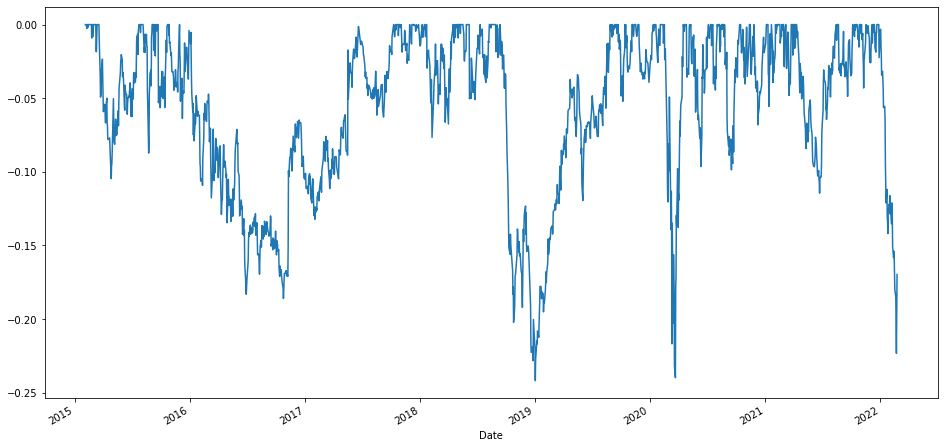

In [ ]:
#Drawdown

drawdownivvb = (wea_idxivvb - picosivvb) / picosivvb
drawdownivvb.plot(figsize=(16,8))


In [ ]:
#Máximo drawdown IVVB11

max_ddwivvb = drawdownivvb.min()

In [ ]:
#Em porcentagem

max_ddwivvb * 100

-24.17922283901664

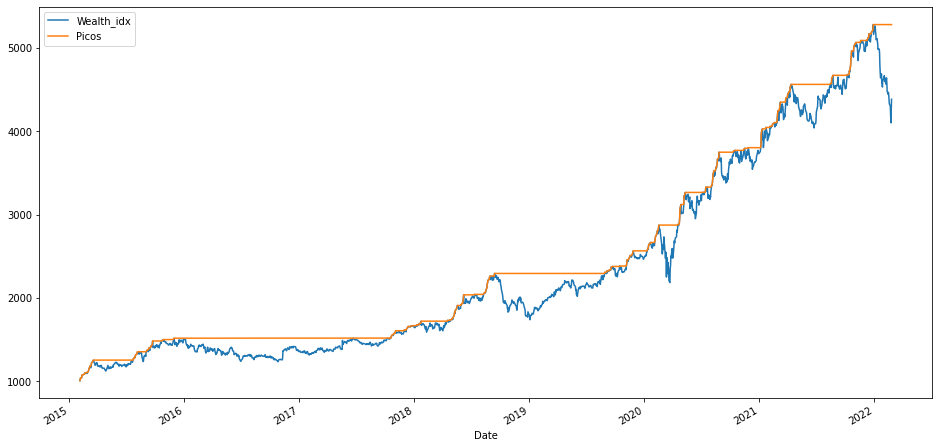

In [ ]:
#Juntando tudo para visualizar graficamente:

ivvbclose['Picos'] = picosivvb
ivvbclose['Drawdowns'] = drawdownivvb

ivvbclose[['Wealth_idx','Picos']].plot(figsize=(16,8))

In [ ]:
#Criando uma lista e atribuindo a um  dataframe com os picos e máximo drawdown dos 3 ativos para comparação:

In [ ]:
ativos = ['BOVA11', 'SMALL11', 'IVVB11']
picos3 = ["2660.81","2970.01","5277.96"]
maxdrawdown3 = ['46.93%', '51.05%', '24.17%']
df = pd.DataFrame(list(zip(ativos, picos3,maxdrawdown3)), columns = ['Ativo','Picos','MaxDrawdown'])
print(df)

     Ativo    Picos MaxDrawdown
0   BOVA11  2660.81      46.93%
1  SMALL11  2970.01      51.05%
2   IVVB11  5277.96      24.17%


In [ ]:
#Unindo as curvas de capital em um dataframe para continuar nossa análise

In [ ]:
bovacurva = pd.DataFrame(bovaclose.Wealth_idx).rename(columns = {'Wealth_idx': 'Curva_BOVA11'})

In [ ]:
smallcurva = pd.DataFrame(smallclose.Wealth_idx).rename(columns = {'Wealth_idx': 'Curva_SMALL11'})

In [ ]:
ivvbcurva = pd.DataFrame(ivvbclose.Wealth_idx).rename(columns = {'Wealth_idx':'Curva_IVVB11'})

In [ ]:
#Juntando os dados em um mesmo data frame

from functools import reduce

dfcurvas = [bovacurva, smallcurva, ivvbcurva]

dfcurvas = reduce(lambda left,right: pd.merge(left, right, on = 'Date', how = 'inner'), dfcurvas)

In [ ]:
dfcurvas.tail()

,Curva_BOVA11,Curva_SMALL11,Curva_IVVB11
Date,,,
2022-02-21,2273.592890,2101.114956,4302.346735
2022-02-22,2306.390182,2145.328720,4213.207204
2022-02-23,2276.343631,2145.328720,4099.508823
2022-02-24,2274.227677,2143.406382,4238.675641
2022-02-25,2304.274228,2134.563629,4382.390395


In [172]:
#Para ter uma visualização interativa vamos plotar a curva de capital dos três ETF's em um gráfico com o PLOTLY https://plotly.com/python/

In [173]:
#Importando o PLOTLY

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime


In [179]:
# Plotando o gráfico

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(name='BOVA11', x=dfcurvas.index, y=dfcurvas['Curva_BOVA11'], marker_color='blue'),row=1,col=1)
fig.add_trace(go.Scatter(name='SMALL11', x=dfcurvas.index, y=dfcurvas['Curva_SMALL11'], marker_color='red'),row=1,col=1)
fig.add_trace(go.Scatter(name='IVVB11', x=dfcurvas.index, y=dfcurvas['Curva_IVVB11'], marker_color='green'),row=1,col=1)
fig.update_xaxes(title_text="<b> Curva de Capital de R$1000,00 investidos desde 2015 em BOVA11 x SMALL11 x IVVB11", row=1, col=1)
fig.update_layout(xaxis_rangeslider_visible=False,width=1000 ,height=500)